In [34]:
### 'IBMQ.get_provider( )', 'IBM.save_account', 'IBM.load_account()':
from qiskit_ibm_runtime import QiskitRuntimeService
#service = QiskitRuntimeService(channel='ibm_quantum', token = my_token)
#QiskitRuntimeService .save_account(channel='ibm_quantum', token = my_token)

import math
from numpy import *
from qiskit import *
from qiskit_aer import AerSimulator; 
from qiskit_ibm_runtime import *
from qiskit.transpiler.preset_passmanagers import *
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import *
import matplotlib.pyplot as plt

### 'Aer.get_backend( )'
simulator = AerSimulator()
pm = generate_preset_pass_manager(backend=simulator, optimization_level=3)

### simulação -> sampler
sampler = Sampler(backend = simulator)
sampler.options.default_shots = 20000  ### Nshots
nshots = sampler.options.default_shots  

In [2]:
def XX(theta): #1
    qc = QuantumCircuit(2)   
    qc.h(0); qc.h(1); qc.cx(0, 1)
    qc.rz(-2*theta, [1])
    qc.cx(0, 1); qc.h(0); qc.h(1)
    return qc

In [3]:
def YY(theta): #1
    qc = QuantumCircuit(2)   
    qc.rx(pi/2, 0); qc.rx(pi/2, 1); qc.cx(0, 1)
    qc.rz(-2*theta, [1])
    qc.cx(0, 1); qc.rx(-pi/2, 0); qc.rx(-pi/2, 1)
    return qc

In [4]:
H_df = QuantumCircuit(2)
H_df.append(XX(pi/8), [[0], [1]])
H_df.append(YY(pi/8), [[0], [1]])

H_e = QuantumCircuit(2)
H_e.append(XX(pi/4), [[0], [1]])
H_e.append(YY(pi/4), [[0], [1]])

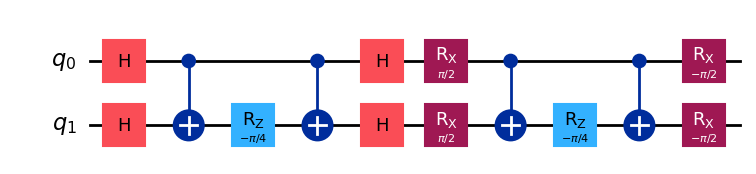

In [5]:
H_df.decompose().draw('mpl')

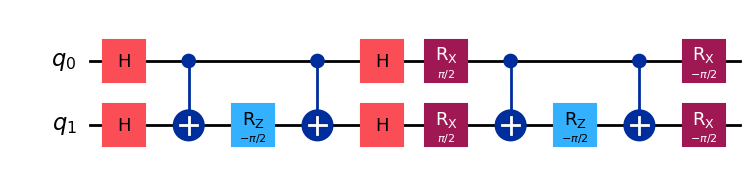

In [6]:
H_e.decompose().draw('mpl')

In [7]:
def divisor():
    qc = QuantumCircuit(2, name='   '+r'$U_{DF}$'+'   ')
    qc.append(H_df, [[0], [1]])
    return qc

def espelho():
    qc = QuantumCircuit(2, name='    '+r'$U_{E}$'+'    ')
    qc.append(H_e, [[0], [1]])
    return qc

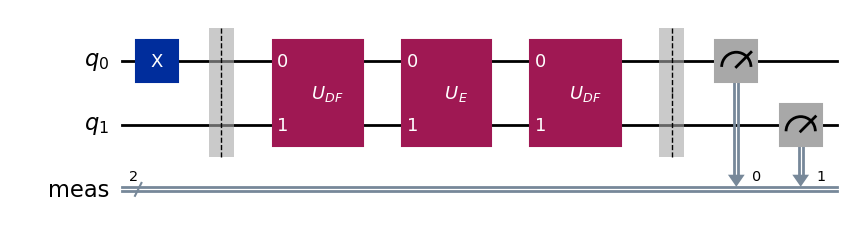

In [8]:
imz1 = QuantumCircuit(2)
imz1.x(0)
imz1.barrier()
imz1.append(divisor(), [[0], [1]])
imz1.append(espelho(), [[0], [1]])
imz1.append(divisor(), [[0], [1]])
imz1.measure_all()
imz1.draw('mpl')

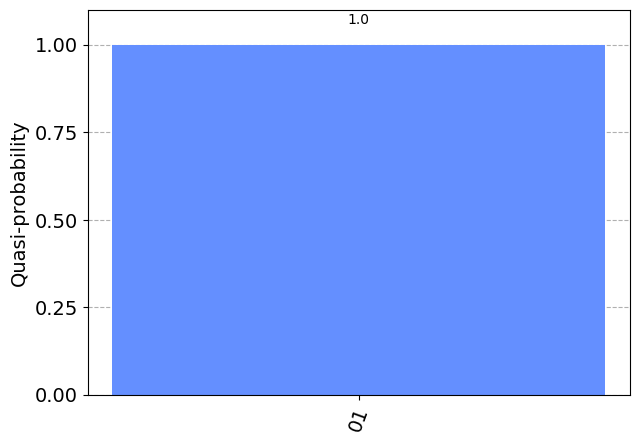

In [9]:
plot_distribution(sampler.run([transpile(imz1, simulator, optimization_level=3)]).result()[0].data.meas.get_counts())

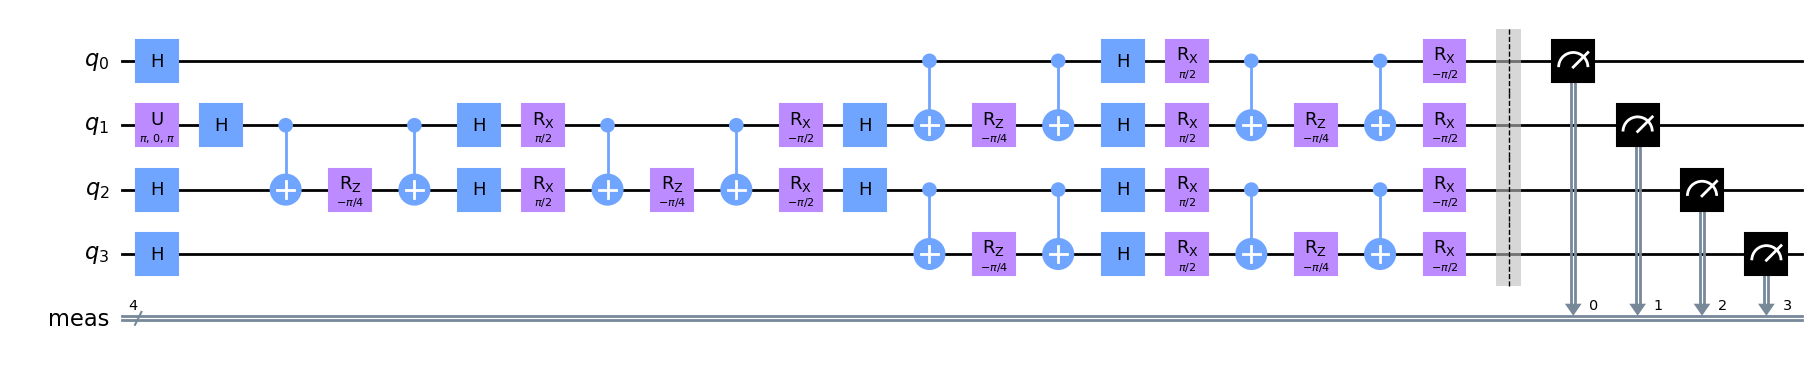

In [49]:
p_jr = QuantumCircuit(4)
p_jr.x(1)

p_jr.append(divisor(), [[1], [2]]) 
p_jr.append(divisor(), [[0], [1]])
p_jr.append(divisor(), [[2], [3]])

p_jr.measure_all()

p_jr.decompose().decompose().decompose().draw('mpl', style='clifford', fold=-1)#.savefig('p-jr-circuit.png', dpi=500)

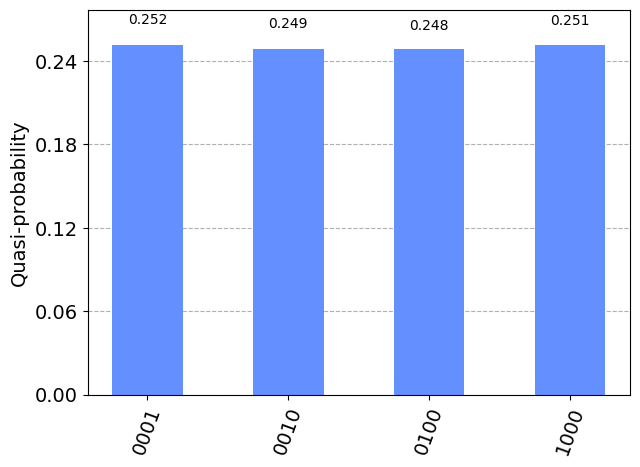

In [35]:
plot_distribution(sampler.run([transpile(p_jr, simulator, optimization_level=1)]).result()[0].data.meas.get_counts())

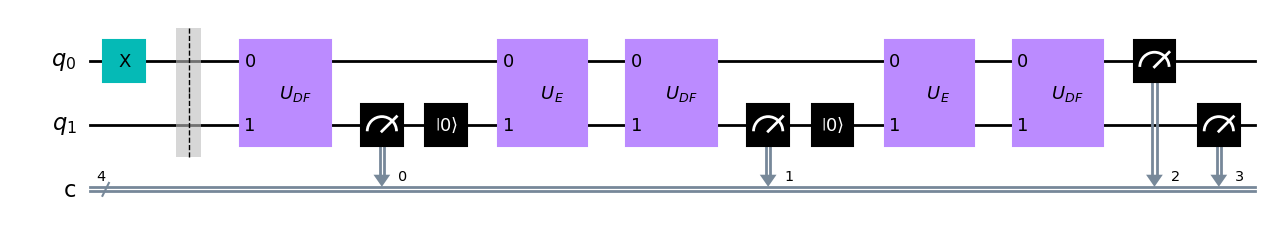

In [48]:
unruh = QuantumCircuit(2, 4)
unruh.x(0)
unruh.barrier()
unruh.append(divisor(), [[0], [1]])
unruh.measure(1, 0)
unruh.reset(1)
unruh.append(espelho(), [[0], [1]])
unruh.append(divisor(), [[0], [1]])
unruh.measure(1, 1)
unruh.reset(1)
unruh.append(espelho(), [[0], [1]])
unruh.append(divisor(), [[0], [1]])
unruh.measure(0, 2)
unruh.measure(1, 3)
unruh.draw('mpl', style='clifford')

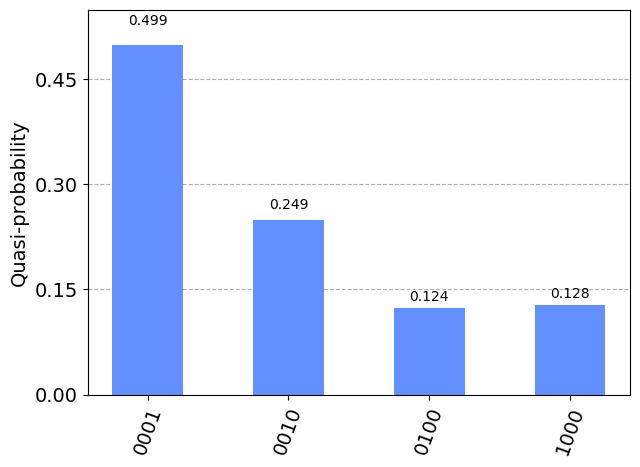

In [47]:
plot_distribution(sampler.run([transpile(unruh, simulator, optimization_level=1)]).result()[0].data.c.get_counts())